<a href="https://colab.research.google.com/github/rashmi-raviprasad/springboard/blob/master/faces_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

% matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
SAMPLE_DIRECTORY = '/content/drive/My Drive/Springboard DS Course/CAPSTONE 2/IMAGES/sample_dataset'
IMAGE_DIRECTORY = '/content/drive/My Drive/Springboard DS Course/CAPSTONE 2/IMAGES'

In [164]:
SAMPLE_RUN = False

if SAMPLE_RUN:
  all_sample_imgs = []
  y_train_sample = []
  y_valid_sample = []
  for folder in os.listdir(SAMPLE_DIRECTORY):
    for file in os.listdir(SAMPLE_DIRECTORY+'/'+folder):
      fn = SAMPLE_DIRECTORY + '/' + folder + '/' + file
      img = cv2.imread(fn)
      rgb_image =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      all_sample_imgs.append(rgb_image.astype(np.float32) / 255.)
  seed = 42
  np.random.seed(seed)
  np.random.shuffle(all_sample_imgs)
  y_train_sample = all_sample_imgs[:40]
  y_valid_sample = all_sample_imgs[40:]
  x_train_sample = np.arange(len(y_train_sample))
  x_valid_sample = np.arange(len(y_valid_sample))
  x_all_sample = np.arange(len(all_sample_imgs))
  ALL_DIM = np.asarray(all_sample_imgs).shape[0]
  TRAIN_DIM = np.asarray(y_train_sample).shape[0]
  VALID_DIM = np.asarray(y_valid_sample).shape[0]
  x = np.array(x_all_sample)
  y = np.array(all_sample_imgs)


else:
  all_imgs = []
  y_train = []
  y_valid = []
  try:
    for folder in os.listdir(IMAGE_DIRECTORY)[:2]:
      for file in tqdm(os.listdir(IMAGE_DIRECTORY+'/'+folder)[:3000]):
        fn = IMAGE_DIRECTORY + '/' + folder + '/' + file
        img = cv2.imread(fn)
        rgb_image =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        all_imgs.append(rgb_image.astype(np.float32) / 255.)
  except:
    print(file)
  seed = 42
  np.random.seed(seed)
  np.random.shuffle(all_imgs)
  #y_train = all_imgs[:40000]
  #y_valid = all_imgs[40000:]
  #x_valid = np.arange(len(y_valid))
  x_all = np.arange(len(all_imgs))
  ALL_DIM = np.asarray(all_imgs).shape[0]
  TRAIN_DIM = np.asarray(y_train).shape[0]
  VALID_DIM = np.asarray(y_valid).shape[0]
  x = np.array(x_all)
  y = np.array(all_imgs)

100%|██████████| 3000/3000 [06:53<00:00,  3.82it/s]


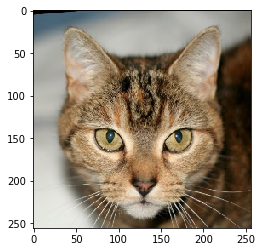

6000


In [167]:
plt.imshow(all_imgs[3572])
plt.show()
print(len(all_imgs))

In [268]:
from keras.models import Sequential
from keras.layers import Activation, Input, Flatten, Reshape
from keras.layers.convolutional import Conv2DTranspose
from keras.layers.embeddings import Embedding
from keras.callbacks import TensorBoard
from keras import backend as K
K.set_image_data_format('channels_last')
K.clear_session()

In [269]:
BATCH_SIZE = 10
N_COMPONENTS = 100

decoder = Sequential()
decoder.add(Embedding(input_dim=ALL_DIM, output_dim=N_COMPONENTS, input_length=1))
decoder.add(Flatten())
decoder.output_shape # (None, 100)

(None, 100)

In [270]:
decoder.add(Reshape((1, 1, N_COMPONENTS)))
decoder.output_shape # (None, 1, 1, 100)

(None, 1, 1, 100)

In [271]:
decoder.add(Conv2DTranspose(filters=64, kernel_size=3, strides=1, activation='relu'))
decoder.output_shape

(None, 3, 3, 64)

In [272]:
decoder.add(Conv2DTranspose(filters=64, kernel_size=3, strides=1, activation='relu'))
decoder.output_shape

(None, 5, 5, 64)

In [273]:
decoder.add(Conv2DTranspose(filters=32, kernel_size=3, strides=1, activation='relu'))
decoder.output_shape

(None, 7, 7, 32)

In [274]:
decoder.add(Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation='relu'))
decoder.output_shape

(None, 15, 15, 32)

In [275]:
decoder.add(Conv2DTranspose(filters=16, kernel_size=3, strides=2, activation='relu'))
decoder.output_shape

(None, 31, 31, 16)

In [276]:
decoder.add(Conv2DTranspose(filters=16, kernel_size=3, strides=2, activation='relu'))
decoder.output_shape

(None, 63, 63, 16)

In [277]:
decoder.add(Conv2DTranspose(filters=8, kernel_size=3, strides=2, activation='relu'))
decoder.output_shape 

(None, 127, 127, 8)

In [278]:
decoder.add(Conv2DTranspose(filters=3, kernel_size=4, strides=2, activation='sigmoid'))
decoder.output_shape

(None, 256, 256, 3)

In [0]:
decoder.compile(optimizer='adam', loss='mse')

In [280]:
%reload_ext tensorboard
from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./logs (started 0:06:14 ago; pid 6104)


In [0]:
N_EPOCHS = 20

!rm -rf ./logs/ 

logdir = './logs'
tensorboard_callback = TensorBoard(logdir, histogram_freq=0)
%tensorboard --logdir ./logs

In [282]:
history = decoder.fit(x, y, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2, callbacks=[tensorboard_callback])

Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 62s 13ms/step - loss: 0.0685 - val_loss: 0.0655
Epoch 2/20
4800/4800 [==============================] - 60s 12ms/step - loss: 0.0601 - val_loss: 0.0669
Epoch 3/20
4800/4800 [==============================] - 59s 12ms/step - loss: 0.0462 - val_loss: 0.0678
Epoch 4/20
4800/4800 [==============================] - 64s 13ms/step - loss: 0.0365 - val_loss: 0.0674
Epoch 5/20
4800/4800 [==============================] - 59s 12ms/step - loss: 0.0313 - val_loss: 0.0674
Epoch 6/20
4800/4800 [==============================] - 62s 13ms/step - loss: 0.0281 - val_loss: 0.0674
Epoch 7/20
4800/4800 [==============================] - 61s 13ms/step - loss: 0.0261 - val_loss: 0.0675
Epoch 8/20
4800/4800 [==============================] - 60s 13ms/step - loss: 0.0244 - val_loss: 0.0673
Epoch 9/20
4800/4800 [==============================] - 61s 13ms/step - loss: 0.0230 - val_loss: 0.0683
Epoch 10/20
4800

In [0]:
compressed = decoder.predict(x, batch_size=BATCH_SIZE)

2895


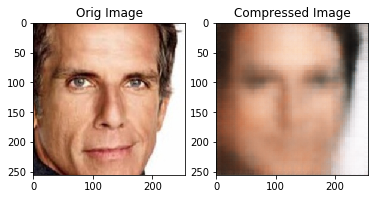

In [348]:
PIC = np.random.choice(6000)
print(PIC)
plt.subplot(1,2,1)
plt.imshow(all_imgs[PIC])
plt.title('Orig Image')

plt.subplot(1,2,2)
plt.imshow(compressed[PIC])
plt.title('Compressed Image')

plt.show()

In [311]:
print(decoder.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 100)            600000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 100)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 3, 3, 64)          57664     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 5, 5, 64)          36928     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 15, 15, 32)       